In [58]:
import pandas_datareader.data as web
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
from keras import optimizers
import math

In [2]:
start = datetime(2013, 8, 7)
end = datetime(2018, 9, 23)

In [3]:
df = web.DataReader('F', 'iex', start, end)
print(df.loc['2013-10-09'])

open      1.285330e+01
high      1.303240e+01
low       1.272880e+01
close     1.293900e+01
volume    5.082105e+07
Name: 2013-10-09, dtype: float64


In [4]:
stock = df.loc[:,'open']
num = len(stock)
step = 200
x = np.arange(num)
print(num)

1250


In [5]:
xlabels = []
for i in range(0, int(num/step)+1):
    xlabels.append(df.index[step*i])

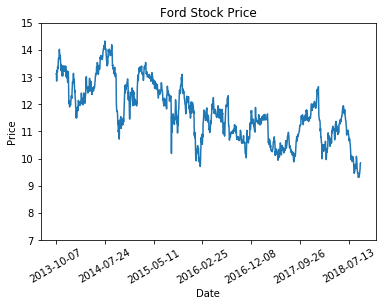

In [6]:
plt.plot(x, stock)
plt.xlabel('Date')
plt.xticks(np.arange(0, 1259, step=step), xlabels, rotation=30)
plt.ylabel('Price')
plt.ylim(7, 15)
plt.title('Ford Stock Price')
plt.show()
plt.close()

In [7]:
x = x.reshape(-1, 1)
y = stock
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
#x = np.arange(num).reshape(-1, 1)
y_pred = regr.predict(x)

In [9]:
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print('Variance score: %.2f' % r2_score(y, y_pred))

Mean squared error: 0.50
Variance score: 0.56


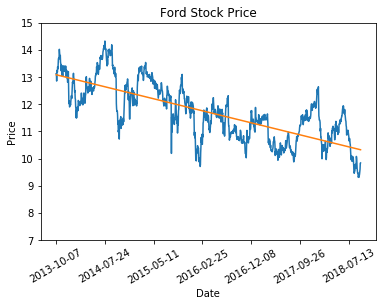

In [10]:
plt.plot(x, stock)
plt.plot(np.arange(0, num), y_pred)
plt.xlabel('Date')
plt.xticks(np.arange(0, 1259, step=step), xlabels, rotation=30)
plt.ylabel('Price')
plt.ylim(7, 15)
plt.title('Ford Stock Price')
plt.show()
plt.close()

In [11]:
x = np.arange(num)/num
x = x.reshape(-1, 1)
y = stock

In [12]:
scaler = MinMaxScaler()
y = np.array(stock).reshape(len(stock), 1)
scaler = scaler.fit(y)
y = scaler.transform(y)
y = y.reshape(len(stock))

In [13]:
shuffle_indices = np.random.permutation(np.arange(len(y)))
y = y[shuffle_indices]
x = x[shuffle_indices]

In [14]:
network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(1,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1))

In [15]:
network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history = network.fit(x, y, epochs=1000, batch_size=125)

Epoch 1/1000
1250/1250 [==============================] - 1s 411us/step - loss: 0.1880 - mean_squared_error: 0.1880
Epoch 2/1000
1250/1250 [==============================] - 0s 26us/step - loss: 0.0871 - mean_squared_error: 0.0871
Epoch 3/1000
1250/1250 [==============================] - 0s 25us/step - loss: 0.0565 - mean_squared_error: 0.0565
Epoch 4/1000
1250/1250 [==============================] - 0s 22us/step - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 5/1000
1250/1250 [==============================] - 0s 25us/step - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 6/1000
1250/1250 [==============================] - 0s 22us/step - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 7/1000
1250/1250 [==============================] - 0s 22us/step - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 8/1000
1250/1250 [==============================] - 0s 23us/step - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 9/1000
1250/1250 [==============================] - 0s 26us/step - loss: 

1250/1250 [==============================] - 0s 25us/step - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 72/1000
1250/1250 [==============================] - 0s 28us/step - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 73/1000
1250/1250 [==============================] - 0s 26us/step - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 74/1000
1250/1250 [==============================] - 0s 23us/step - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 75/1000
1250/1250 [==============================] - 0s 27us/step - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 76/1000
1250/1250 [==============================] - 0s 22us/step - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 77/1000
1250/1250 [==============================] - 0s 26us/step - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 78/1000
1250/1250 [==============================] - 0s 22us/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 79/1000
1250/1250 [==============================] - 0s 26us/step - loss: 0.0169

1250/1250 [==============================] - 0s 23us/step - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 142/1000
1250/1250 [==============================] - 0s 22us/step - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 143/1000
1250/1250 [==============================] - 0s 21us/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 144/1000
1250/1250 [==============================] - 0s 22us/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 145/1000
1250/1250 [==============================] - 0s 22us/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 146/1000
1250/1250 [==============================] - 0s 22us/step - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 147/1000
1250/1250 [==============================] - 0s 22us/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 148/1000
1250/1250 [==============================] - 0s 22us/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 149/1000
1250/1250 [==============================] - 0s 21us/step - loss

1250/1250 [==============================] - 0s 30us/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 212/1000
1250/1250 [==============================] - 0s 32us/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 213/1000
1250/1250 [==============================] - 0s 29us/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 214/1000
1250/1250 [==============================] - 0s 26us/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 215/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 216/1000
1250/1250 [==============================] - 0s 29us/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 217/1000
1250/1250 [==============================] - 0s 38us/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 218/1000
1250/1250 [==============================] - 0s 32us/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 219/1000
1250/1250 [==============================] - 0s 26us/step - loss

1250/1250 [==============================] - 0s 29us/step - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 282/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 283/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 284/1000
1250/1250 [==============================] - 0s 29us/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 285/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 286/1000
1250/1250 [==============================] - 0s 29us/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 287/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 288/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 289/1000
1250/1250 [==============================] - 0s 29us/step - loss

1250/1250 [==============================] - 0s 30us/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 352/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 353/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 354/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0055 - mean_squared_error: 0.0055
Epoch 355/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 356/1000
1250/1250 [==============================] - 0s 29us/step - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 357/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 358/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 359/1000
1250/1250 [==============================] - 0s 30us/step - loss

1250/1250 [==============================] - 0s 30us/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 421/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 422/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 423/1000
1250/1250 [==============================] - 0s 31us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 424/1000
1250/1250 [==============================] - 0s 31us/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 425/1000
1250/1250 [==============================] - 0s 31us/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 426/1000
1250/1250 [==============================] - 0s 31us/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 427/1000
1250/1250 [==============================] - 0s 31us/step - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 428/1000
1250/1250 [==============================] - 0s 31us/step - loss

1250/1250 [==============================] - 0s 30us/step - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 491/1000
1250/1250 [==============================] - 0s 29us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 492/1000
1250/1250 [==============================] - 0s 29us/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 493/1000
1250/1250 [==============================] - 0s 29us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 494/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 495/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 496/1000
1250/1250 [==============================] - 0s 31us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 497/1000
1250/1250 [==============================] - 0s 30us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 498/1000
1250/1250 [==============================] - 0s 30us/step - loss

1250/1250 [==============================] - 0s 31us/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 561/1000
1250/1250 [==============================] - 0s 33us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 562/1000
1250/1250 [==============================] - 0s 31us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 563/1000
1250/1250 [==============================] - 0s 32us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 564/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 565/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 566/1000
1250/1250 [==============================] - 0s 35us/step - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 567/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 568/1000
1250/1250 [==============================] - 0s 33us/step - loss

1250/1250 [==============================] - 0s 35us/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 631/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 632/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 633/1000
1250/1250 [==============================] - 0s 36us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 634/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 635/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 636/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 637/1000
1250/1250 [==============================] - 0s 36us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 638/1000
1250/1250 [==============================] - 0s 34us/step - loss

1250/1250 [==============================] - 0s 38us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 701/1000
1250/1250 [==============================] - 0s 39us/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 702/1000
1250/1250 [==============================] - 0s 41us/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 703/1000
1250/1250 [==============================] - 0s 41us/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 704/1000
1250/1250 [==============================] - 0s 47us/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 705/1000
1250/1250 [==============================] - 0s 45us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 706/1000
1250/1250 [==============================] - 0s 41us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 707/1000
1250/1250 [==============================] - 0s 46us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 708/1000
1250/1250 [==============================] - 0s 43us/step - loss

1250/1250 [==============================] - 0s 37us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 771/1000
1250/1250 [==============================] - 0s 39us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 772/1000
1250/1250 [==============================] - 0s 39us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 773/1000
1250/1250 [==============================] - 0s 41us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 774/1000
1250/1250 [==============================] - 0s 40us/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 775/1000
1250/1250 [==============================] - 0s 38us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 776/1000
1250/1250 [==============================] - 0s 40us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 777/1000
1250/1250 [==============================] - 0s 41us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 778/1000
1250/1250 [==============================] - 0s 42us/step - loss

1250/1250 [==============================] - 0s 39us/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 841/1000
1250/1250 [==============================] - 0s 41us/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 842/1000
1250/1250 [==============================] - 0s 38us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 843/1000
1250/1250 [==============================] - 0s 42us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 844/1000
1250/1250 [==============================] - 0s 40us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 845/1000
1250/1250 [==============================] - 0s 38us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 846/1000
1250/1250 [==============================] - 0s 36us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 847/1000
1250/1250 [==============================] - 0s 37us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 848/1000
1250/1250 [==============================] - 0s 37us/step - loss

1250/1250 [==============================] - 0s 36us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 911/1000
1250/1250 [==============================] - 0s 35us/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 912/1000
1250/1250 [==============================] - 0s 35us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 913/1000
1250/1250 [==============================] - 0s 35us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 914/1000
1250/1250 [==============================] - 0s 35us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 915/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 916/1000
1250/1250 [==============================] - 0s 33us/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 917/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 918/1000
1250/1250 [==============================] - 0s 33us/step - loss

1250/1250 [==============================] - 0s 34us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 981/1000
1250/1250 [==============================] - 0s 35us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 982/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 983/1000
1250/1250 [==============================] - 0s 35us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 984/1000
1250/1250 [==============================] - 0s 33us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 985/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 986/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 987/1000
1250/1250 [==============================] - 0s 34us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 988/1000
1250/1250 [==============================] - 0s 36us/step - loss

In [46]:
xrange = 1500
x = np.arange(xrange)/num

In [47]:
y_pred = network.predict(x)
y_pred = scaler.inverse_transform(y_pred)[:,0]

In [48]:
y_pred[1259]

9.545277

In [59]:
step = 200
base = datetime.strptime(df.index[0], '%Y-%m-%d')
xlabels = [(base + timedelta(days=step*x*7/5)).date() for x in range(0, math.ceil(xrange/step))]

In [60]:
xlabels

[datetime.date(2013, 10, 7),
 datetime.date(2014, 7, 14),
 datetime.date(2015, 4, 20),
 datetime.date(2016, 1, 25),
 datetime.date(2016, 10, 31),
 datetime.date(2017, 8, 7),
 datetime.date(2018, 5, 14),
 datetime.date(2019, 2, 18)]

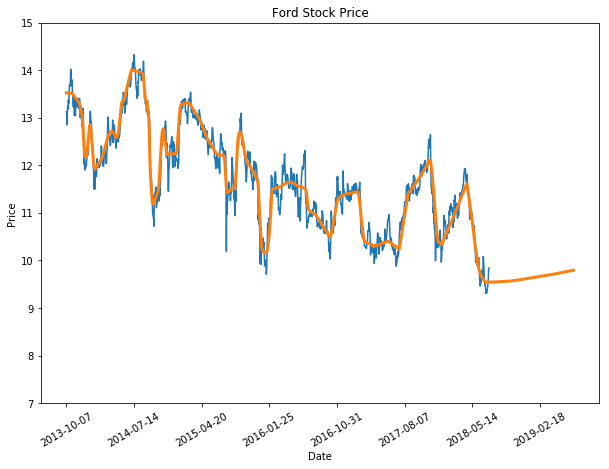

In [63]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(0, num), stock)
plt.plot(np.arange(0, xrange), y_pred, lw=3)
#plt.scatter(np.arange(0, xrange), y_pred, s=1, marker='o', c='orange')

plt.xlabel('Date')
plt.xticks(np.arange(0, 1500, step=step), xlabels, rotation=30)
plt.ylabel('Price')
plt.ylim(7, 15)
plt.title('Ford Stock Price')
plt.show()
plt.close()

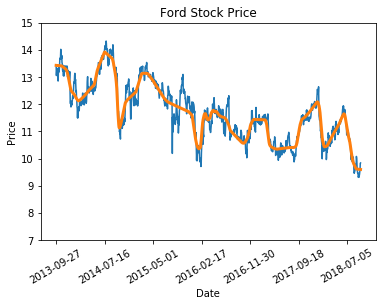

In [101]:
plt.plot(np.arange(0, num), stock)
plt.plot(np.arange(0, num), y_pred, lw=3)
#plt.scatter(shuffle_indices, y_pred, s=1, marker='o', c='orange')

plt.xlabel('Date')
plt.xticks(np.arange(0, 1259, step=step), xlabels, rotation=30)
plt.ylabel('Price')
plt.ylim(7, 15)
plt.title('Ford Stock Price')
plt.show()
plt.close()